<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(style='darkgrid')
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/sensor_ml.csv", index_col="id")
# sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [ ]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,1,0,1,2022-10-26 11:29:12
2,1,1,0,1,2022-10-26 11:29:12
3,1,1,0,1,2022-10-26 11:29:13
4,1,1,0,1,2022-10-26 11:29:13
5,1,1,0,1,2022-10-26 11:29:13
...,...,...,...,...,...
3660,1,1,0,1,2022-10-26 11:40:06
3661,1,1,0,1,2022-10-26 11:40:06
3662,1,1,0,1,2022-10-26 11:40:06


In [ ]:
sensor_df.shape

(3664, 5)

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at           chan_1
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  1         5
                              ..
2022-10-26 11:40:04  1         5
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_1, Length: 678, dtype: int64

In [ ]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at           chan_2
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  1         5
                              ..
2022-10-26 11:40:04  1         5
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_2, Length: 711, dtype: int64

In [ ]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at           chan_3
2022-10-26 11:29:12  0         2
2022-10-26 11:29:13  0         6
2022-10-26 11:29:14  0         7
2022-10-26 11:29:15  0         7
2022-10-26 11:29:16  0         5
                              ..
2022-10-26 11:40:04  0         5
2022-10-26 11:40:05  0         6
2022-10-26 11:40:06  0         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_3, Length: 706, dtype: int64

In [ ]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at           chan_4
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  0         3
                              ..
2022-10-26 11:40:04  1         1
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_4, Length: 867, dtype: int64

In [ ]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [ ]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-10-26 11:29:12,1,1,0,1
2022-10-26 11:29:13,1,1,0,1
2022-10-26 11:29:14,1,1,0,1
2022-10-26 11:29:15,1,1,0,1
2022-10-26 11:29:16,1,1,0,1
...,...,...,...,...
2022-10-26 11:40:04,1,1,0,0
2022-10-26 11:40:05,1,1,0,1
2022-10-26 11:40:06,1,1,0,1


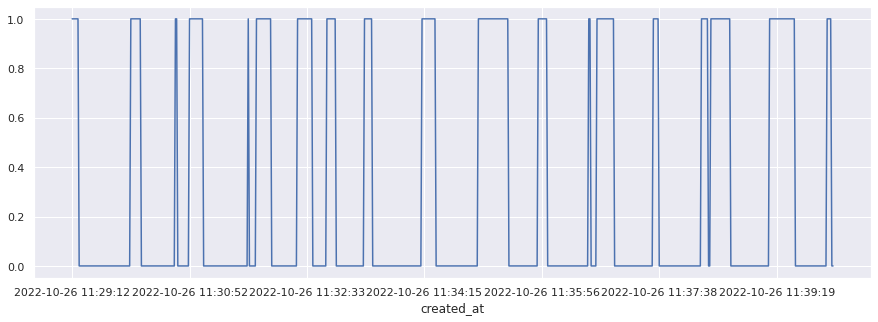

In [ ]:
sensor_copy_df["chan_1"].plot()

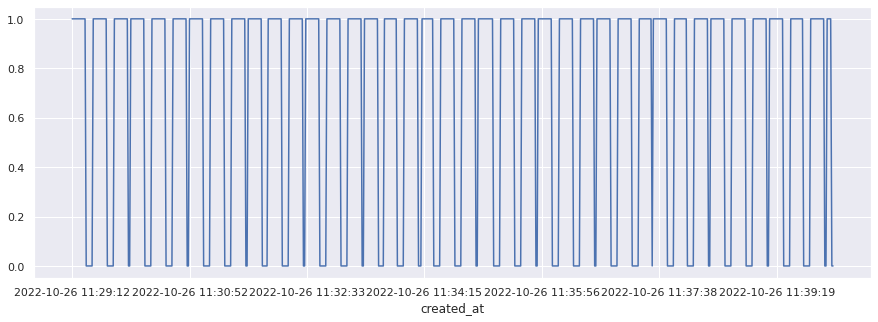

In [ ]:
sensor_copy_df["chan_2"].plot()

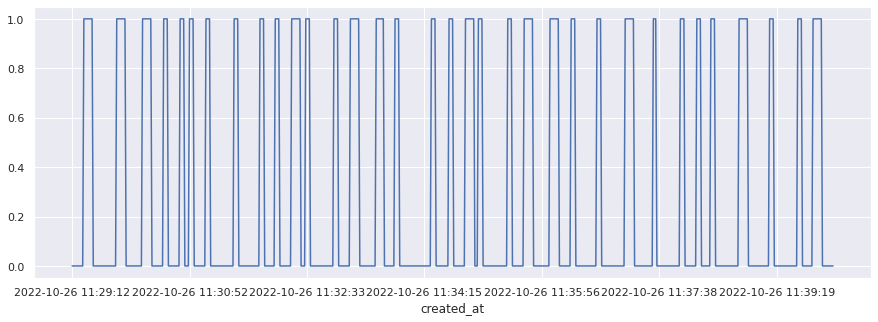

In [ ]:
sensor_copy_df["chan_3"].plot()

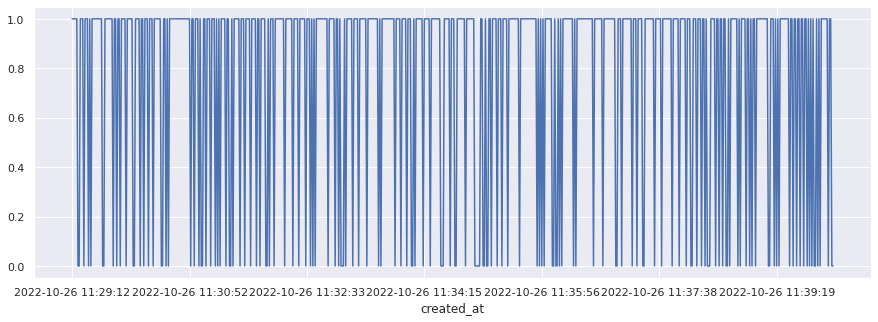

In [ ]:
sensor_copy_df["chan_4"].plot()

In [ ]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    y.append(df.to_numpy()[window_size+i])
  return np.array(X), np.array(y)

In [ ]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((639, 10, 4), (639, 4))

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [ ]:
def build_model(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(255, 10, 4) (255, 4)
(192, 10, 4) (192, 4)
(192, 10, 4) (192, 4)


In [ ]:
model = build_model((X.shape[1], X.shape[2]))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 45)            9000      
                                                                 
 dropout (Dropout)           (None, 10, 45)            0         
                                                                 
 lstm_7 (LSTM)               (None, 45)                16380     
                                                                 
 dense_8 (Dense)             (None, 8)                 368       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
Total params: 25,784
Trainable params: 25,784
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/50
9/9 [==============================] - 5s 159ms/step - loss: 0.6829 - binary_accuracy: 0.6078 - val_loss: 0.6710 - val_binary_accuracy: 0.6029
Epoch 2/50
9/9 [==============================] - 0s 26ms/step - loss: 0.6414 - binary_accuracy: 0.6735 - val_loss: 0.6329 - val_binary_accuracy: 0.7057
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.5994 - binary_accuracy: 0.7353 - val_loss: 0.6112 - val_binary_accuracy: 0.7279
Epoch 4/50
9/9 [==============================] - 0s 22ms/step - loss: 0.5813 - binary_accuracy: 0.7343 - val_loss: 0.5855 - val_binary_accuracy: 0.7279
Epoch 5/50
9/9 [==============================] - 0s 22ms/step - loss: 0.5699 - binary_accuracy: 0.7343 - val_loss: 0.5830 - val_binary_accuracy: 0.7279
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.5595 - binary_accuracy: 0.7343 - val_loss: 0.5783 - val_binary_accuracy: 0.7292
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.5561 - b

Text(0, 0.5, 'accuracy')

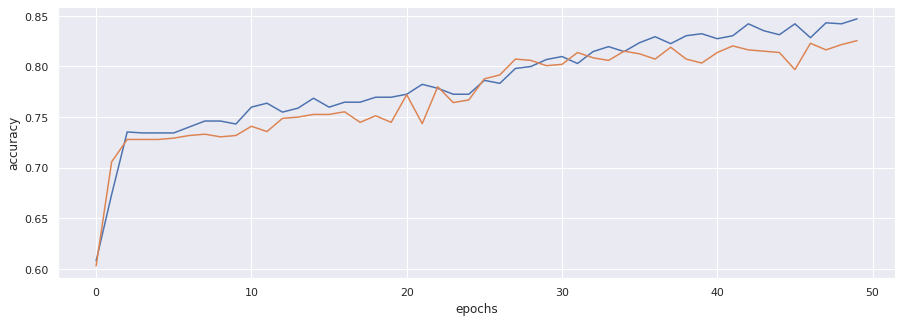

In [ ]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

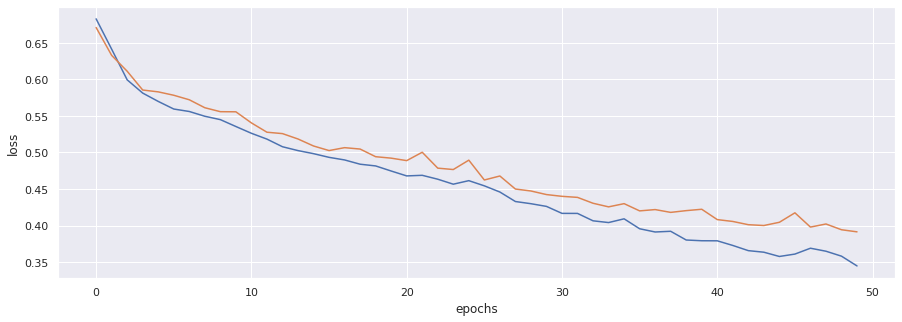

In [ ]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

6/6 [==============================] - 1s 8ms/step


array([[0, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 1,

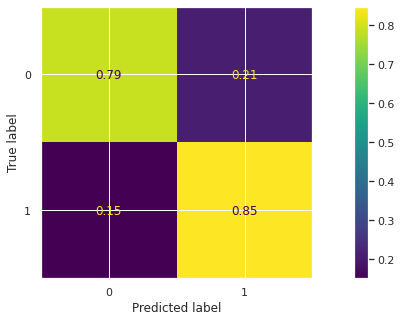

In [ ]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

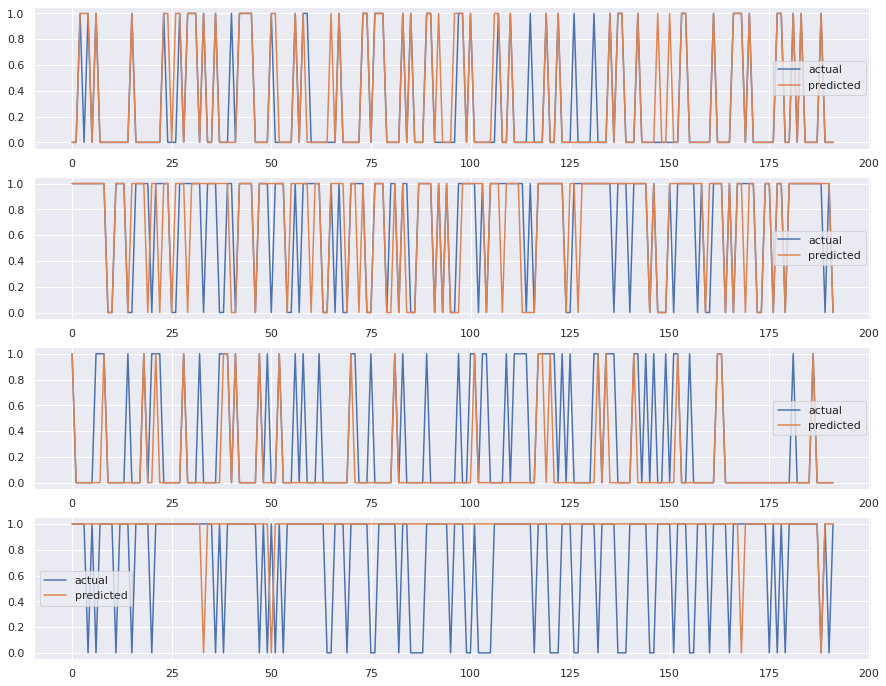

In [ ]:
nchannels = y.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y_test[:, i], label="actual")
  ax[i].plot(test_predictions[:, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [ ]:
def save_model(model, filename="model.tflite"):
  # convert the keras model to tflite
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  tflite_model = converter.convert()

  # save the tflite model
  with tf.io.gfile.GFile(filename, "wb") as f:
    f.write(tflite_model)

In [62]:
# save_model(model)
model.save("model")

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [63]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        # print(i, bit)
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
            else:
                # 1,1
                continue
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))

    return np.array(idle_times)

In [64]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if i+j[0][0] <= i else 0 for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [65]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-10-26 11:29:12,0,0,10,0
2022-10-26 11:29:13,0,0,9,0
2022-10-26 11:29:14,0,0,8,0
2022-10-26 11:29:15,0,0,7,0
2022-10-26 11:29:16,0,0,6,0
...,...,...,...,...
2022-10-26 11:40:04,0,0,5,1
2022-10-26 11:40:05,0,0,4,0
2022-10-26 11:40:06,0,0,3,0


In [66]:
X2, y2 = df_to_X_y(idle_times_df)
X2.shape, y2.shape

((639, 10, 4), (639, 4))

In [67]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.6)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((255, 10, 4), (192, 10, 4), (192, 10, 4))

In [78]:
def build_model2(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu")
  ])

In [79]:
model2 = build_model2((X2.shape[1], X2.shape[2]))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 45)            9000      
                                                                 
 dropout_2 (Dropout)         (None, 10, 45)            0         
                                                                 
 lstm_11 (LSTM)              (None, 45)                16380     
                                                                 
 dropout_3 (Dropout)         (None, 45)                0         
                                                                 
 dense_12 (Dense)            (None, 16)                736       
                                                                 
 dense_13 (Dense)            (None, 4)                 68        
                                                                 
Total params: 26,184
Trainable params: 26,184
Non-trai

In [80]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [81]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=40, validation_data=(X2_val, y2_val))

Epoch 1/40
9/9 [==============================] - 5s 140ms/step - loss: 88.5916 - accuracy: 0.5451 - val_loss: 75.7585 - val_accuracy: 0.7917
Epoch 2/40
9/9 [==============================] - 0s 17ms/step - loss: 82.8921 - accuracy: 0.7490 - val_loss: 69.6115 - val_accuracy: 0.7812
Epoch 3/40
9/9 [==============================] - 0s 19ms/step - loss: 75.7236 - accuracy: 0.7490 - val_loss: 62.3443 - val_accuracy: 0.6979
Epoch 4/40
9/9 [==============================] - 0s 26ms/step - loss: 67.7174 - accuracy: 0.6627 - val_loss: 55.3706 - val_accuracy: 0.6198
Epoch 5/40
9/9 [==============================] - 0s 26ms/step - loss: 60.2927 - accuracy: 0.6196 - val_loss: 49.7262 - val_accuracy: 0.6198
Epoch 6/40
9/9 [==============================] - 0s 27ms/step - loss: 54.9525 - accuracy: 0.6157 - val_loss: 46.0528 - val_accuracy: 0.6198
Epoch 7/40
9/9 [==============================] - 0s 22ms/step - loss: 51.0729 - accuracy: 0.6275 - val_loss: 44.1524 - val_accuracy: 0.6198
Epoch 8/40
9

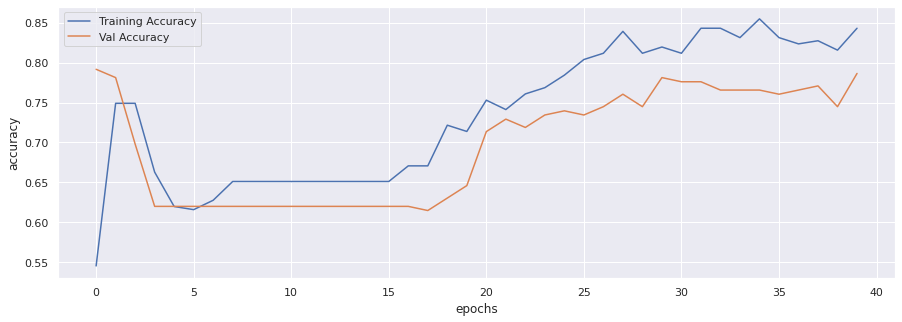

In [82]:
plt.plot(history2.history["accuracy"], label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

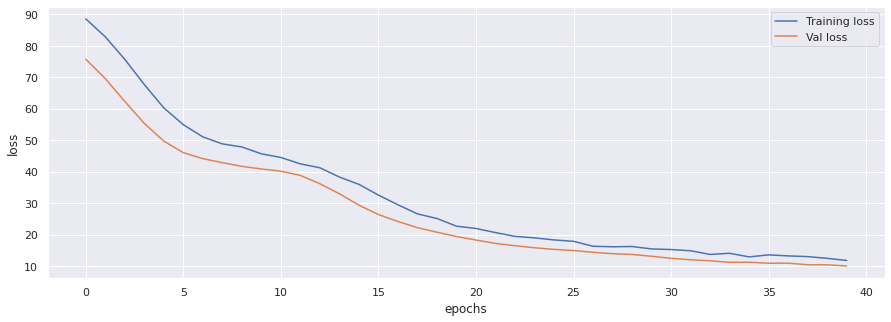

In [83]:
plt.plot(history2.history["loss"], label="Training loss")
plt.plot(history2.history["val_loss"], label="Val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [84]:
test_preds = model2.predict(X2_test)
test_preds

6/6 [==============================] - 1s 5ms/step


array([[1.87571507e+01, 9.73838329e-01, 2.97960973e+00, 0.00000000e+00],
       [7.27450132e+00, 4.95600998e-01, 1.13616896e+00, 0.00000000e+00],
       [2.58053455e+01, 1.47005713e+00, 9.72513008e+00, 0.00000000e+00],
       [1.23894405e+01, 8.26193213e-01, 1.95208287e+00, 0.00000000e+00],
       [4.39019060e+00, 9.88598466e-01, 1.33488760e+01, 0.00000000e+00],
       [6.97661972e+00, 5.66998601e-01, 1.39930117e+00, 0.00000000e+00],
       [3.61020994e+00, 9.38578188e-01, 1.16565342e+01, 0.00000000e+00],
       [1.99036160e+01, 1.24009240e+00, 3.81344533e+00, 0.00000000e+00],
       [6.74180365e+00, 1.10430205e+00, 1.37694597e+01, 0.00000000e+00],
       [1.26365147e+01, 1.38339758e+00, 1.51761169e+01, 0.00000000e+00],
       [1.83037281e+00, 3.79325569e-01, 2.39886451e+00, 0.00000000e+00],
       [2.57069244e+01, 1.38416171e+00, 4.84661722e+00, 0.00000000e+00],
       [2.17614841e+01, 1.31898940e+00, 5.00409365e+00, 0.00000000e+00],
       [1.07375708e+01, 5.05794823e-01, 1.18731511e

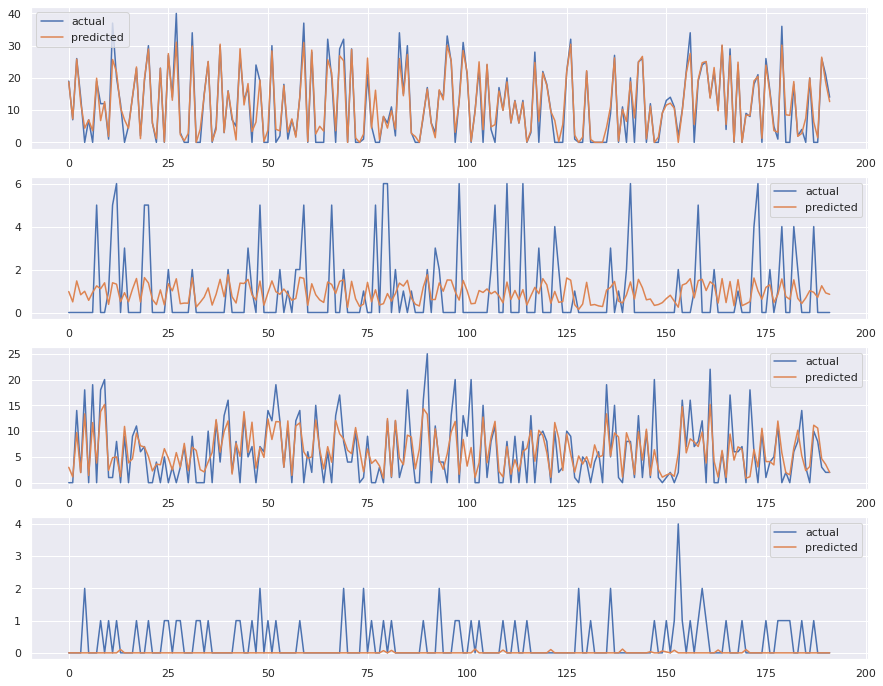

In [85]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:, i], label="actual")
  ax[i].plot(test_preds[:, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [86]:
# save_model(model2, "model2.tflite")
model2.save("model2")